### Data Inspection

In [ ]:
import pandas as pd
df=  pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [ ]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.describe(include='all')

id  gender          age  hypertension  heart_disease  \
count    5110.000000    5110  5110.000000   5110.000000    5110.000000   
unique           NaN       3          NaN           NaN            NaN   
top              NaN  Female          NaN           NaN            NaN   
freq             NaN    2994          NaN           NaN            NaN   
mean    36517.829354     NaN    43.226614      0.097456       0.054012   
std     21161.721625     NaN    22.612647      0.296607       0.226063   
min        67.000000     NaN     0.080000      0.000000       0.000000   
25%     17741.250000     NaN    25.000000      0.000000       0.000000   
50%     36932.000000     NaN    45.000000      0.000000       0.000000   
75%     54682.000000     NaN    61.000000      0.000000       0.000000   
max     72940.000000     NaN    82.000000      1.000000       1.000000   

       ever_married work_type Residence_type  avg_glucose_level          bmi  \
count          5110      5110           5110        5110.000000  4909.000000   
unique            2         5              2                NaN          NaN   
top             Yes   Private          Urban                NaN          NaN   
freq           3353      2925           2596                NaN          NaN   
mean            NaN       NaN            NaN         106.147677    28.893237   
std             NaN       NaN            NaN          45.283560     7.854067   
min             NaN       NaN            NaN          55.120000    10.300000   
25%             NaN       NaN            NaN          77.245000    23.500000   
50%             NaN       NaN            NaN          91.885000    28.100000   
75%             NaN       NaN            NaN         114.090000    33.100000   
max             NaN       NaN            NaN         271.740000    97.600000   

       smoking_status       stroke  
count            5110  5110.000000  
unique              4          NaN  
top      never smoked          NaN  
freq             1892          NaN  
mean              NaN     0.048728  
std               NaN     0.215320  
min               NaN     0.000000  
25%               NaN     0.000000  
50%               NaN     0.000000  
75%               NaN     0.000000  
max               NaN     1.000000

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Data Visualisations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

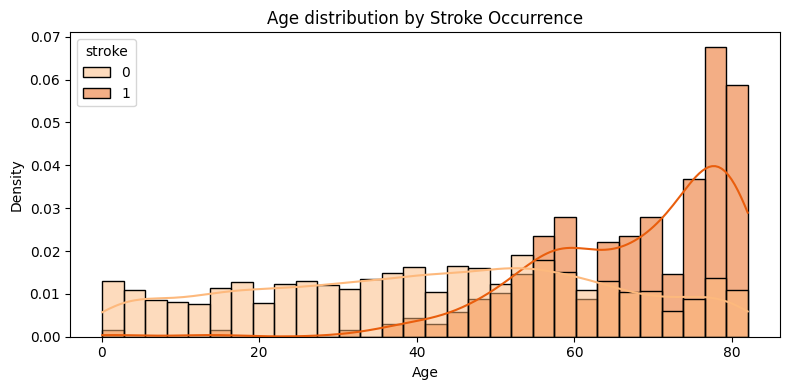

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="age",hue="stroke", bins=30, kde=True, palette='Oranges',stat="density" , common_norm=False)
plt.title("Age distribution by Stroke Occurrence")
plt.xlabel("Age")
plt.ylabel("Density" )
plt.tight_layout()
plt.show()

Stroke occurrence is higher in older age groups, confirming age is directly related and could be considered as a primary risk factor.

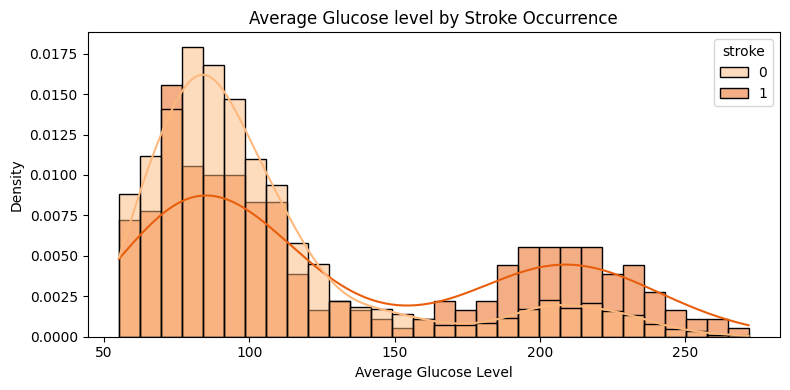

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="avg_glucose_level",hue="stroke", bins=30, kde=True, stat="density", common_norm=False,palette='Oranges')
plt.title("Average Glucose level by Stroke Occurrence")
plt.xlabel("Average Glucose Level")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

High glucose is more common among stroke patients, highlighting its importance as a feature, and the dangerousness of sugar in contributing towards a stroke.


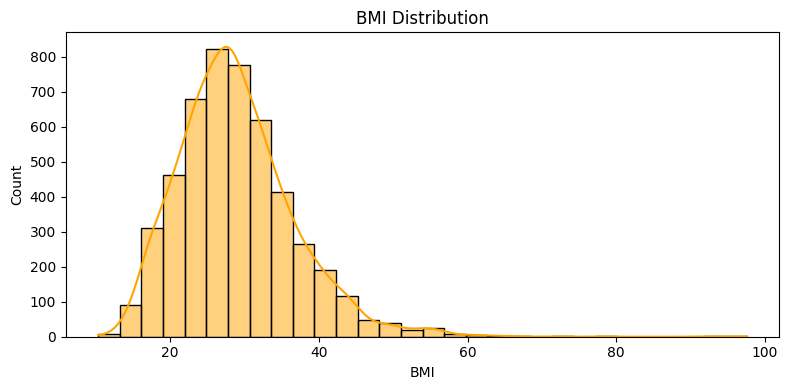

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['bmi'].dropna(), bins=30,kde=True, color ="orange")
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Thisplot shows that most patients have a BMI between 20 and 40, with a right-skewed distribution and a few outliers at very high BMI, high weight in general and  BMI is a known risk factor for cardiovascular events, including stroke. Although high BMI doesnt necessarily mean an unhealthy body,yet with the given data features, its okay to include it and understnd its distribution to ensure we process and scale this feature appropriately for our model.


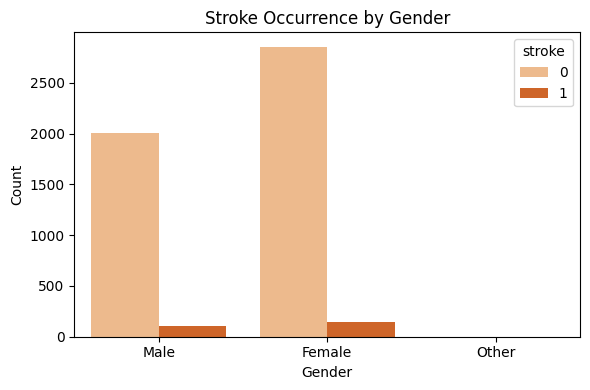

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='stroke',palette='Oranges',data=df)
plt.title("Stroke Occurrence by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

This plot suggests that Females are lessprone to strokes vs men (at least with the data given)

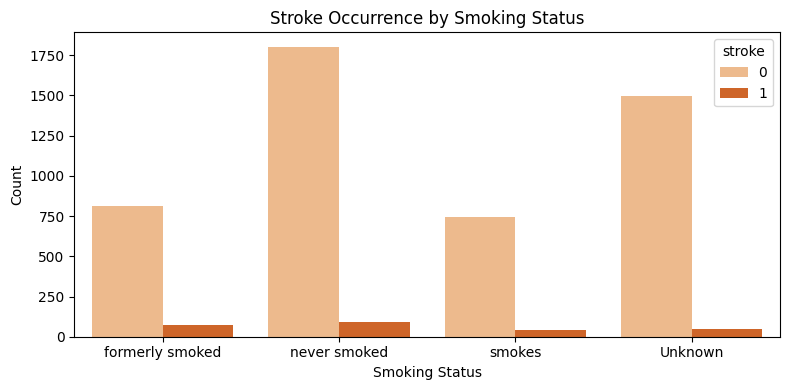

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='smoking_status' , hue='stroke', data=df,palette='Oranges')
plt.title("Stroke Occurrence by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Smokers have higher stroke rates, suggesting the need to keep this variable.

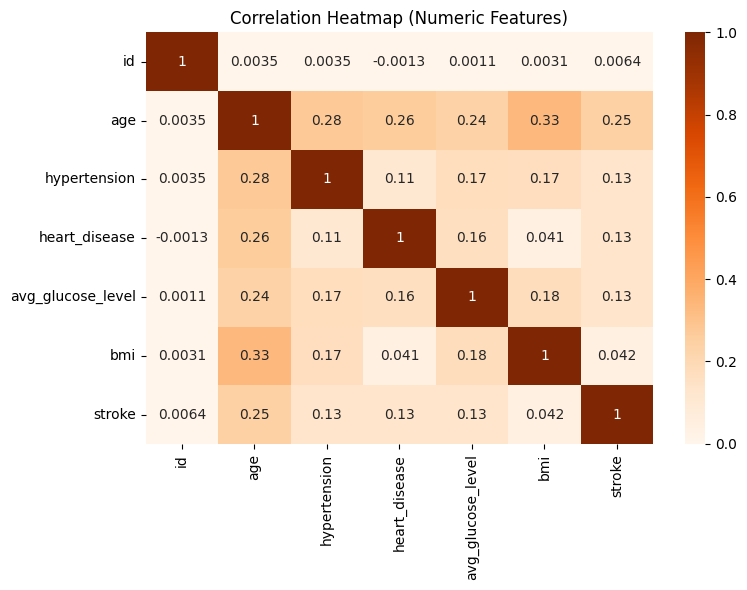

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="Oranges")
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

This map shows correlation between features, appreantly the id column is useless and will dropped later in the notebook. moreover, the highest correlations with stroke  are found in `age`, `hypertension`, and `heart_disease`. This confirms clinical understanding of these established stroke risk factors. also othr variables like `avg_glucose_level` and `bmi` have lower correlations, but we can  still includ those for their potential combined effect with other features (again with the given data features).



### Data Preprocessing

Visualizations reveal far fewer stroke cases than non-stroke, requiring handling class imbalance and special data modeling to hit the fitting target in our mind.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import class_weight

In [ ]:
df_clean = df.drop(columns=["id"])

In [ ]:
bmi_imputer = SimpleImputer(strategy="median")
df_clean["bmi"] = bmi_imputer.fit_transform(df_clean[["bmi"]])

Features are selected based on both clinical relevance (based on the analysis and visualisations done previously) and data availability.

In [ ]:
label_encoders = {}
for col in ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

Encoding the required data ensures correct format to feed the model, and imputing missing values ensures that our model can learn effectively from all records without introducing bias or any type of  error.

In [ ]:
X = df_clean.drop(columns=["stroke"])
y = df_clean["stroke"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
    )

In [ ]:
stroke_counts = y_train.value_counts()
stroke_counts

stroke
0    3889
1     199
Name: count, dtype: int64

This shows imbalance in  our dataset(target variable), "stroke" is ppretty rare compared to "no-strokke". If unaddressed, the model may "play it safe" and predict no stroke for nearly everyone, which defeats the purpose in a medical screening setting. To fix this, we use SMOTE to generate synthetic stroke cases in the training set.


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state =42)
X_train_sm, y_train_sm= smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE: " )
print(pd.Series(y_train_sm).value_counts())

Class distribution after SMOTE: 
stroke
0    3889
1    3889
Name: count, dtype: int64


### Model Building

After applying SMOTE (Synthetic Minority Over-sampling Technique) to balance the minority class (stroke = 1) in the training set, we can start building a neural network that fits it well. From its name, generate synthetic examples similar examples by interpolating between existing ones of the minority class. although it doesnt give the same result as an ideal dataset with balanced classes, yet it somehow helps the model generalize better and avoid overfitting

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

I chose to build a feedforward neural network using Sequential from Keras, which stacks layers oneafter the other.


*   Hidden layer with 32 neurons, with RELU as an activation function
*   Second hidden layer with 16 neurons, also with RELU as an activation function
*   Final output layer with 1 neuron, used for binary classification (sigmoid).







In [ ]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_sm.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


using the popular ADAM optimizer tocompile the model, which adapts the learning rate and speeds up convergences efficinetly, alosusing this typeof loss which is best forbinary classification problems.

In [ ]:
model.compile(
              optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

The trainig starts, the dataset was divided into batches of 32 samples each during training, going through it 20 times(epochs), with 20% f the dataset preserved for validation purposes during training. at the end 'history' will contain the training and validation loss and accuracy

In [ ]:
history = model.fit(
    X_train_sm,y_train_sm,
    epochs =20,
    batch_size=32,
    validation_split= 0.2,
    verbose= 1
)


Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6703 - loss: 0.6215 - val_accuracy: 0.7339 - val_loss: 0.6020
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7755 - loss: 0.4504 - val_accuracy: 0.7461 - val_loss: 0.5759
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7919 - loss: 0.4181 - val_accuracy: 0.7783 - val_loss: 0.5518
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8050 - loss: 0.4019 - val_accuracy: 0.7931 - val_loss: 0.5182
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8046 - loss: 0.4006 - val_accuracy: 0.8246 - val_loss: 0.4748
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8070 - loss: 0.3948 - val_accuracy: 0.8149 - val_loss: 0.4870
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8143 - loss: 0.3839 - val_accuracy: 0.8162 - val_loss: 0.4793
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8210 - loss: 0.3765 - val_accuracy: 0.

### Baseline medol evaluation

Training done, here comes the testing,  here we start predicing probabilities for each sample in the test set. with a default threshold of 0.5, to convert the predicted probabilities into a class. and evaluation metrics exist to better understand performance on each class.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification report:\n", classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.8033
Precision: 0.1088
Recall: 0.4200
F1-score: 0.1728

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89       972
           1       0.11      0.42      0.17        50

    accuracy                           0.80      1022
   macro avg       0.54      0.62      0.53      1022
weighted avg       0.92      0.80      0.85      1022



### Model Improvment

The first iteration of improvement includes bilding a more dense neursl network architecture, with more layers and neurons, which allows the  model to learn more complex pattersn and makesit more robust against non linear relationships.

* First hidden layer with 32 neurons, and RELU as an activation function.
* second hd32 neurons with	ReLU	(can learn deeper representations)
* 16 neurons 	ReLU	(added abstraction)
* output sigmoid layer (binart classification)

In [ ]:
from tensorflow.keras import layers, models

model1 = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_sm.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train_sm, y_train_sm, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


195/195 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6987 - loss: 0.5676 - val_accuracy: 0.7641 - val_loss: 0.5729
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7965 - loss: 0.4173 - val_accuracy: 0.8021 - val_loss: 0.5222
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8093 - loss: 0.3939 - val_accuracy: 0.7853 - val_loss: 0.5346
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8138 - loss: 0.3824 - val_accuracy: 0.8721 - val_loss: 0.4116
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8387 - loss: 0.3522 - val_accuracy: 0.8535 - val_loss: 0.4333
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8464 - loss: 0.3365 - val_accuracy: 0.8927 - val_loss: 0.3653
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8480 - loss: 0.3214 - val_accuracy: 0.8817 - val_loss: 0.3802
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8499 - loss: 0.3246 - val_accuracy: 0.8393 - val

Next iteration of improvementr introduces a training-time improvement that helps make the model more fair to both classes and less focused on just naive overall accuracy, more on balanced learning.
we first compute the clas weights, and build the model and fit using class weights, this difers from SMOTE in that it doesnt just create new data, yet when computing the loss for each training example, it tells the model to multiply it by its class weight. A wrong prediction on class 1 (e.g., missing a stroke) will have a higher loss penalty than one on class 0. hence the model will be guided to learn features of the minority class better.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights= compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict ={0: class_weights[0], 1: class_weights[1]}

model2 = models.Sequential([
    layers.Dense(32,activation='relu', input_shape=(X_train_sm.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam' , loss='binary_crossentropy', metrics=['accuracy'])
history2= model2.fit(X_train_sm, y_train_sm, epochs=20, batch_size=32, validation_split=0.2,
                      class_weight=class_weight_dict, verbose=1)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4130 - loss: 2.0189 - val_accuracy: 0.9994 - val_loss: 0.0605
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5513 - loss: 0.8122 - val_accuracy: 0.9974 - val_loss: 0.0490
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6301 - loss: 0.7293 - val_accuracy: 0.9968 - val_loss: 0.0517
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6607 - loss: 0.6824 - val_accuracy: 0.9974 - val_loss: 0.0490
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6738 - loss: 0.6538 - val_accuracy: 0.9994 - val_loss: 0.0389
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6757 - loss: 0.6497 - val_accuracy: 0.9968 - val_loss: 0.0446
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6954 - loss: 0.6260 - val_accuracy: 0.9981 - val_loss: 0.0452
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6980 - loss: 0.6190 - val_accuracy: 0.9981 - val_

In our final improvement, we test a neural network that includes two advanced techniques for improving training performance:

1.   LeakyReLU activation instead of standard ReLU (allows a small, non-zero gradient for negative inputs aand prevents the dying relu problem)
2.   Dropout layers for regularization (which randomly drops 30%% of the neurons during training, helping prevent overfitting by making the network rely on different combinationss of neurons)

Alowing to reduce overfitting while maintaining a neat recall and precision overall

In [ ]:
model3= models.Sequential([
    layers.Dense(32),
    layers.LeakyReLU(alpha=0.1),
    layers.Dropout(0.3),
    layers.Dense(16),
    layers.LeakyReLU(alpha=0.1) ,
    layers.Dropout(0.2),
    layers.Dense(1,activation='sigmoid')
])
model3.compile(optimizer='adam',loss='binary_crossentropy' , metrics=['accuracy'])
history3 =model3.fit(X_train_sm, y_train_sm, epochs=20, batch_size=32,validation_split=0.2, verbose=1 )


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6033 - loss: 0.6767 - val_accuracy: 0.7622 - val_loss: 0.5660
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7452 - loss: 0.4976 - val_accuracy: 0.7622 - val_loss: 0.5805
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7554 - loss: 0.4654 - val_accuracy: 0.8168 - val_loss: 0.5301
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7780 - loss: 0.4442 - val_accuracy: 0.8335 - val_loss: 0.5283
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7791 - loss: 0.4354 - val_accuracy: 0.8149 - val_loss: 0.5620
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7849 - loss: 0.4293 - val_accuracy: 0.8554 - val_loss: 0.5178
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7784 - loss: 0.4376 - val_accuracy: 0.8689 - val_loss: 0.4896
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7937 - loss: 0.4208 - val_accuracy: 0.8573 - val_

In [ ]:
from sklearn.metrics import classification_report

for idx, model in enumerate([model1, model2,model3], start=1):
    y_pred_prob= model.predict(X_test).flatten()
    y_pred = (y_pred_prob>0.5).astype(int)
    print(f"Model {idx}:")
    print( classification_report( y_test, y_pred))


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Model 1:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       972
           1       0.14      0.44      0.21        50

    accuracy                           0.84      1022
   macro avg       0.55      0.65      0.56      1022
weighted avg       0.93      0.84      0.88      1022

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Model 2:
              precision    recall  f1-score   support

           0       0.99      0.64      0.77       972
           1       0.10      0.82      0.19        50

    accuracy                           0.65      1022
   macro avg       0.55      0.73      0.48      1022
weighted avg       0.94      0.65      0.75      1022

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Model 3:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       972
           1       0.16      0.76      0.26        50

    accuracy                          

Model 1 is okay, yet theres room for improvement.

Model2 is the recall champ, but at a cost/9ow precision)

*Model 3* offers the best balance of recall and usefulness.  






With Recall 0.76 (still far higher than Model 1), Precision 0.16 (60 % better than Model 2), and the highest macro-F1 and good accuracy. Through a better atchotecure and a balamced dataset, you can get pretty decent reliable results to your problem statement. And For life-critical, highly imbalanced problems like stroke prediction,optimising Recall anf precision metrics aligns directly with patient safety and clinical usability, whereas plain accuracy does not.

Missing a stroke (false-negative) can delay treatment → disability or death.
If precision is low, clinicians receive floods of false alarms → wasted scans, cost, alarm fatigue, and loss of trust in the tool.

## Model Deployment

In [6]:
# Create the complete Flask + Docker project with a ready-to-load model

import os, json, textwrap, joblib, numpy as np, pandas as pd
from pathlib import Path

root = Path("C:/Users/wissa/Downloads/data/stroke-flask-docker")
(root / "model").mkdir(parents=True, exist_ok=True)
(root / "templates").mkdir(parents=True, exist_ok=True)
(root / "static").mkdir(parents=True, exist_ok=True)
(root / "tests").mkdir(parents=True, exist_ok=True)
(root / "data").mkdir(parents=True, exist_ok=True)

# -----------------------------
# 1) app.py (Flask app)
# -----------------------------
app_py = r'''from flask import Flask, render_template, request, jsonify
import joblib
import numpy as np
import os

APP_PORT = int(os.getenv("PORT", "8080"))

app = Flask(__name__)

MODEL_PATH = os.getenv("MODEL_PATH", "model/stroke_pipeline.joblib")

# Load model pipeline at startup
try:
    pipeline = joblib.load(MODEL_PATH)
except Exception as e:
    raise RuntimeError(f"Failed to load model at {MODEL_PATH}: {e}")

FEATURE_ORDER = [
    "gender",
    "age",
    "hypertension",
    "heart_disease",
    "ever_married",
    "work_type",
    "Residence_type",
    "avg_glucose_level",
    "bmi",
    "smoking_status",
]

# Simple healthcheck
@app.route("/health", methods=["GET"])
def health():
    return jsonify({"status": "ok"}), 200

@app.route("/", methods=["GET"])
def index():
    # Provide default values to make testing easy
    defaults = {
        "gender": "Female",
        "age": 45,
        "hypertension": 0,
        "heart_disease": 0,
        "ever_married": "Yes",
        "work_type": "Private",
        "Residence_type": "Urban",
        "avg_glucose_level": 95.0,
        "bmi": 28.0,
        "smoking_status": "never smoked",
    }
    return render_template("index.html", defaults=defaults)

@app.route("/predict", methods=["POST"])
def predict():
    try:
        # Read input either from JSON (API) or form (UI)
        if request.is_json:
            payload = request.get_json()
        else:
            payload = request.form.to_dict()

        # Ensure types
        # Map numeric fields
        numeric_fields = ["age", "avg_glucose_level", "bmi"]
        int_fields = ["hypertension", "heart_disease"]

        for k in numeric_fields:
            if k in payload:
                payload[k] = float(payload[k])
        for k in int_fields:
            if k in payload:
                payload[k] = int(payload[k])

        # Build row in fixed feature order
        row = [[payload.get(f, None) for f in FEATURE_ORDER]]

        # Predict proba (stroke = 1)
        prob = float(pipeline.predict_proba(row)[0][1])
        pred = int(prob >= 0.5)

        result = {"stroke_probability": prob, "predicted_label": pred}
        if request.is_json:
            return jsonify(result)
        else:
            return render_template("index.html", result=result, defaults=payload)
    except Exception as e:
        msg = {"error": str(e)}
        if request.is_json:
            return jsonify(msg), 400
        else:
            return render_template("index.html", error=str(e), defaults=request.form), 400

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=APP_PORT, debug=False)
'''
(root / "app.py").write_text(app_py, encoding="utf-8")


# -----------------------------
# 2) HTML template
# -----------------------------
index_html = r'''<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8"/>
  <meta name="viewport" content="width=device-width, initial-scale=1.0"/>
  <title>Stroke Risk Predictor</title>
  <link rel="stylesheet" href="/static/style.css"/>
</head>
<body>
  <div class="container">
    <h1>💓 Stroke Risk Predictor</h1>
    <p>Enter patient details and get a predicted stroke probability.</p>

    {% if error %}
      <div class="error">{{ error }}</div>
    {% endif %}

    <form method="POST" action="/predict" class="card">
      <div class="row">
        <label>Gender</label>
        <select name="gender">
          {% for g in ["Male","Female","Other"] %}
            <option value="{{g}}" {% if defaults.gender==g %}selected{% endif %}>{{g}}</option>
          {% endfor %}
        </select>
      </div>

      <div class="row">
        <label>Age</label>
        <input type="number" name="age" step="1" min="0" max="120" value="{{defaults.age}}"/>
      </div>

      <div class="row">
        <label>Hypertension</label>
        <select name="hypertension">
          {% for v in [0,1] %}
            <option value="{{v}}" {% if defaults.hypertension==v %}selected{% endif %}>{{v}}</option>
          {% endfor %}
        </select>
      </div>

      <div class="row">
        <label>Heart Disease</label>
        <select name="heart_disease">
          {% for v in [0,1] %}
            <option value="{{v}}" {% if defaults.heart_disease==v %}selected{% endif %}>{{v}}</option>
          {% endfor %}
        </select>
      </div>

      <div class="row">
        <label>Ever Married</label>
        <select name="ever_married">
          {% for v in ["Yes","No"] %}
            <option value="{{v}}" {% if defaults.ever_married==v %}selected{% endif %}>{{v}}</option>
          {% endfor %}
        </select>
      </div>

      <div class="row">
        <label>Work Type</label>
        <select name="work_type">
          {% for v in ["Private","Self-employed","Govt_job","children","Never_worked"] %}
            <option value="{{v}}" {% if defaults.work_type==v %}selected{% endif %}>{{v}}</option>
          {% endfor %}
        </select>
      </div>

      <div class="row">
        <label>Residence Type</label>
        <select name="Residence_type">
          {% for v in ["Urban","Rural"] %}
            <option value="{{v}}" {% if defaults.Residence_type==v %}selected{% endif %}>{{v}}</option>
          {% endfor %}
        </select>
      </div>

      <div class="row">
        <label>Avg. Glucose Level</label>
        <input type="number" name="avg_glucose_level" step="0.01" value="{{defaults.avg_glucose_level}}"/>
      </div>

      <div class="row">
        <label>BMI</label>
        <input type="number" name="bmi" step="0.1" value="{{defaults.bmi}}"/>
      </div>

      <div class="row">
        <label>Smoking Status</label>
        <select name="smoking_status">
          {% for v in ["formerly smoked","never smoked","smokes","Unknown"] %}
            <option value="{{v}}" {% if defaults.smoking_status==v %}selected{% endif %}>{{v}}</option>
          {% endfor %}
        </select>
      </div>

      <button type="submit">Predict</button>
    </form>

    {% if result %}
      <div class="result card">
        <h2>Result</h2>
        <p><strong>Predicted Stroke Probability:</strong> {{ '%.3f'|format(result.stroke_probability) }}</p>
        <p><strong>Predicted Label (1 = Stroke):</strong> {{ result.predicted_label }}</p>
      </div>
    {% endif %}

    <div class="api card">
      <h3>API</h3>
      <code>POST /predict</code> with JSON:
      <pre>
{
  "gender":"Female",
  "age":45,
  "hypertension":0,
  "heart_disease":0,
  "ever_married":"Yes",
  "work_type":"Private",
  "Residence_type":"Urban",
  "avg_glucose_level":95.0,
  "bmi":28.0,
  "smoking_status":"never smoked"
}
      </pre>
    </div>
  </div>
</body>
</html>
'''
(root / "templates" / "index.html").write_text(index_html, encoding="utf-8")


# -----------------------------
# 3) CSS
# -----------------------------
style_css = r'''*{box-sizing:border-box}body{font-family:system-ui,-apple-system,Segoe UI,Roboto,Helvetica,Arial,sans-serif;background:#0b1220;color:#e8eef9;margin:0;padding:2rem}
.container{max-width:760px;margin:0 auto}
h1{margin-top:0}
.card{background:#111a2b;border:1px solid #1e2a44;border-radius:14px;padding:1rem;margin:1rem 0}
.row{display:flex;gap:1rem;margin:.6rem 0;align-items:center}
.row label{width:200px}
input,select,button{padding:.5rem;border-radius:8px;border:1px solid #2a3a5e;background:#0e1626;color:#e8eef9}
button{cursor:pointer}
.error{background:#3b0d0d;border:1px solid #7c1919;color:#ffd6d6;border-radius:10px;padding:.75rem;margin-bottom:1rem}
.result p{margin:.3rem 0}
.api code, .api pre{display:block;background:#0e1626;border:1px solid #2a3a5e;padding:8px;border-radius:10px;overflow-x:auto}
'''
(root / "static" / "style.css").write_text(style_css, encoding="utf-8")


# -----------------------------
# 4) Training script (uses real dataset if present; otherwise synthetic)
# -----------------------------
train_py = r'''"""
Train & save a full sklearn Pipeline for stroke prediction.

- If ./data/healthcare-dataset-stroke-data.csv exists, trains on it (matching the notebook structure).
- Otherwise, trains on a synthetic dataset with the same schema.
Saves: model/stroke_pipeline.joblib
"""
from pathlib import Path
import pandas as pd
import numpy as np
import joblib

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

DATA_PATH = Path("C:\Users\wissa\Downloads\data\stroke-flask-docker\data\healthcare-dataset-stroke-data.csv")
OUT_PATH = Path("C:\Users\wissa\Downloads\data\stroke-flask-docker\model/stroke_pipeline.joblib")
OUT_PATH.parent.mkdir(parents=True, exist_ok=True)

CATEGORICAL = ["gender","ever_married","work_type","Residence_type","smoking_status"]
NUMERIC = ["age","avg_glucose_level","bmi"]
BINARY_INT = ["hypertension","heart_disease"]  # keep as numeric ints

def load_real_or_synthetic():
    if DATA_PATH.exists():
        df = pd.read_csv(DATA_PATH)
        # expected columns from the Kaggle stroke dataset
        must_have = ["gender","age","hypertension","heart_disease","ever_married",
                     "work_type","Residence_type","avg_glucose_level","bmi",
                     "smoking_status","stroke"]
        missing = set(must_have) - set(df.columns)
        if missing:
            raise ValueError(f"Dataset is missing columns: {missing}")
        # drop id if present
        df = df[[c for c in df.columns if c in must_have]]
        return df
    else:
        # Synthetic data with the right columns
        rng = np.random.RandomState(42)
        N = 2000
        df = pd.DataFrame({
            "gender": rng.choice(["Male","Female","Other"], size=N, p=[0.49,0.50,0.01]),
            "age": rng.randint(1, 90, size=N),
            "hypertension": rng.binomial(1, 0.15, size=N),
            "heart_disease": rng.binomial(1, 0.08, size=N),
            "ever_married": rng.choice(["Yes","No"], size=N, p=[0.7,0.3]),
            "work_type": rng.choice(["Private","Self-employed","Govt_job","children","Never_worked"], size=N, p=[0.6,0.2,0.18,0.01,0.01]),
            "Residence_type": rng.choice(["Urban","Rural"], size=N, p=[0.55,0.45]),
            "avg_glucose_level": rng.normal(100, 30, size=N).clip(50, 300),
            "bmi": rng.normal(28, 6, size=N).clip(10, 60),
            "smoking_status": rng.choice(["formerly smoked","never smoked","smokes","Unknown"], size=N, p=[0.2,0.6,0.15,0.05]),
        })
        # Fabricate a signal for stroke
        logit = (
            0.03*df["age"] +
            0.02*(df["avg_glucose_level"]-100) +
            0.05*(df["bmi"]-28) +
            0.8*df["hypertension"] +
            0.9*df["heart_disease"] +
            0.3*(df["ever_married"]=="Yes").astype(int)
        )
        prob = 1/(1+np.exp(- (logit-4.0)))  # bias to keep prevalence low
        df["stroke"] = (rng.rand(len(df)) < prob).astype(int)
        return df

def build_pipeline():
    cat_proc = Pipeline(steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore"))
    ])
    num_proc = Pipeline(steps=[
        ("impute", SimpleImputer(strategy="median")),
        ("scale", StandardScaler())
    ])
    # Binary int -> treat as numeric (no scaling needed, but fine to scale)
    bin_proc = Pipeline(steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("scale", StandardScaler(with_mean=False))  # keep sparse-friendly path
    ])

    pre = ColumnTransformer(transformers=[
        ("cat", cat_proc, CATEGORICAL),
        ("num", num_proc, NUMERIC),
        ("bin", bin_proc, BINARY_INT),
    ])

    clf = LogisticRegression(max_iter=1000, n_jobs=None)
    pipeline = Pipeline([("pre", pre), ("clf", clf)])
    return pipeline

def main():
    df = load_real_or_synthetic()

    X = df.drop(columns=["stroke"])
    y = df["stroke"].astype(int)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    pipeline = build_pipeline()
    pipeline.fit(X_train, y_train)

    y_prob = pipeline.predict_proba(X_test)[:,1]
    y_pred = (y_prob >= 0.5).astype(int)

    print("AUC:", roc_auc_score(y_test, y_prob))
    print("Report:\n", classification_report(y_test, y_pred))

    joblib.dump(pipeline, OUT_PATH)
    print(f"Saved pipeline to {OUT_PATH.resolve()}")

if __name__ == "__main__":
    main()
'''
(root / "model" / "train_and_save.py").write_text(train_py, encoding="utf-8")


# -----------------------------
# 5) Build a ready-to-load model now (synthetic training)
# -----------------------------
# We'll run the training script to produce model/stroke_pipeline.joblib
import subprocess, sys
subprocess.run([sys.executable, str(root / "model" / "train_and_save.py")], check=True)


# -----------------------------
# 6) requirements.txt
# -----------------------------
reqs = r'''flask==3.0.3
gunicorn==22.0.0
joblib==1.4.2
numpy==1.26.4
pandas==2.2.2
scikit-learn==1.5.1
'''
(root / "requirements.txt").write_text(reqs, encoding="utf-8")


# -----------------------------
# 7) Dockerfile
# -----------------------------
dockerfile = r'''# Simple CPU-only image
FROM python:3.11-slim

ENV PYTHONDONTWRITEBYTECODE=1 \
    PYTHONUNBUFFERED=1

WORKDIR /app

RUN apt-get update && apt-get install -y --no-install-recommends \
    build-essential \
    && rm -rf /var/lib/apt/lists/*

COPY requirements.txt .
RUN pip install --no-cache-dir -r requirements.txt

# Copy app code and model
COPY . .

# Spaces will set PORT (usually 7860)
ENV PORT=7860 \
    MODEL_PATH="model/stroke_pipeline.joblib"

# Bind to $PORT (required by Spaces)
CMD ["sh", "-c", "gunicorn -w 2 -b 0.0.0.0:${PORT} app:app"]

'''
(root / "Dockerfile").write_text(dockerfile, encoding="utf-8")

CalledProcessError: Command '['c:\\Users\\wissa\\Downloads\\data\\.venv\\Scripts\\python.exe', 'C:\\Users\\wissa\\Downloads\\data\\stroke-flask-docker\\model\\train_and_save.py']' returned non-zero exit status 1.

In [3]:
from pathlib import Path

root = Path("C:/Users/wissa/Downloads/data/stroke-flask-docker")
root.mkdir(parents=True, exist_ok=True)

readme = """# Stroke Predictor - Flask + Docker

A minimal Flask app that serves a stroke risk model with a web form and a JSON API.

## Local run
pip install -r requirements.txt
python app.py  # http://127.0.0.1:8080

## Docker
docker build -t stroke-app:latest .
docker run -p 8080:8080 stroke-app:latest

## Endpoints
GET  /        # form UI
POST /predict # JSON: returns stroke_probability and predicted_label
GET  /health  # healthcheck

Model file: model/stroke_pipeline.joblib
"""

(root / "README.md").write_text(readme, encoding="utf-8")
print("README.md written")


README.md written


In [12]:
!python /content/stroke-flask-docker/model/train_and_save.py

AUC: 0.8417489711934156
Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022

Saved pipeline to /content/stroke-flask-docker/model/stroke_pipeline.joblib
